# <font color = 'indianred'> **EDA TEMPLATE**
For the template, we will use the churn dataset. The data set is available from the 0_Data folder


# <font color = 'indianred'> **Data Dictionary**</font>

 1. **RowNumber** - Gives the row number.
 2. **CustomerId** - The ID of the customer.
 1.  **CreditScore** - The credit score attained by  the customer.
 2.  **Geography** - The Country of the customer.
 3.  **Gender** - The gender of the customer.          
 4.   **Age**    - Age of the customer.          
 5.   **Tenure** - How many years the customer is with the company?       
 6.   **Balance** - Balance in the credit card         
 7.   **NumOfProducts** - Number of products bought by the customer by using credit card  
 8.   **HasCrCard** - Whether the customer has the credit card or not.         
 9.   **IsActiveMember** - Does the customer have active membership?     
 10.  **EstimatedSalary** - Estimated salary of the customer.
 11.  **Exited** - churn(whether the customer left the company or not)


# <font color = 'indianred'>**Import/Install the packages**

In [ ]:
if 'google.colab' in str(get_ipython()):
    print('Running on Colab')
else:
    print('Not Running on Colab')

Running on Colab


In [ ]:
if 'google.colab' in str(get_ipython()):
  !pip install --upgrade feature_engine scikit-learn -q
  from google.colab import drive
  drive.mount('/content/drive')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.6/326.6 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 78.0 MB/s eta 0:00:00
Mounted at /content/drive


In [ ]:
import feature_engine
import sklearn

In [ ]:
print(feature_engine.__version__)
print(sklearn.__version__)

1.6.1
1.3.0


In [ ]:
"""Import Required Libraries and Modules"""

# Data Manipulation and Analysis
import pandas as pd  # For DataFrame operations
import numpy as np  # For numerical computations

# Data Visualization
import matplotlib.pyplot as plt  # For basic plotting
import seaborn as sns  # For advanced plotting
import scipy.stats as stats  # For statistical plots
# To display plots in Jupyter Notebook
%matplotlib inline

# File System Navigation
from pathlib import Path  # For OS-agnostic file path handling
import sys  # For system-specific parameters and functions


# <font color = 'indianred'> **Specify Project Folder Location**

In [ ]:
if 'google.colab' in str(get_ipython()):
    base_folder = Path('/content/drive/MyDrive/data/')
else:
    base_folder = Path('/home/harpreet/Insync/google_drive_shaannoor/data/')

In [ ]:
data_folder = base_folder/'datasets'
save_model_folder = base_folder/'models/ml_fall_2023'
custom_function_folder = base_folder/'custom-functions'
save_model_folder.mkdir(exist_ok=True, parents=True)

The code uses `Path` from the `pathlib` library to handle file directories in a way that's operating system-agnostic, clean, and efficient.

1. **Environment Detection**: Checks if it's running in Google Colab (`'google.colab' in str(get_ipython())`). Depending on the environment, it sets the `base_folder`.

2. **Path Initialization**: Uses `Path` to represent directory paths (`base_folder`, `data_folder`, `save_model_folder`, `custom_function_folder`). This makes the code portable across different OSes.

3. **Path Concatenation**: The `/` operator is used for appending sub-directories (`data_folder = base_folder/'datasets'`). This is simpler and less error-prone than string concatenation.

4. **Directory Creation**: The `mkdir()` method with `exist_ok=True` and `parents=True` flags ensures the directory and its parent directories exist, creating them if necessary.

By using `Path`, the code avoids manual string manipulation for path handling, making it more robust and readable.

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
sys.path.append(str(custom_function_folder))

In [ ]:
sys.path

['/content',
 '/env/python',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/drive/MyDrive/data/custom-functions']

In [ ]:
from eda_plots import diagnostic_plots, plot_target_by_category

The code snippet performs three main tasks, each aimed at enhancing the development workflow and managing Python's search path for modules.

1. **Autoreloading Extension**: The `%load_ext autoreload` line loads an IPython extension called `autoreload`. This extension is useful in development because it automatically reloads modules before entering the execution of code typed at the IPython prompt. It eliminates the need to restart the kernel if you've made changes to external files your notebook depends on.

2. **Autoreload Setting**: The `%autoreload 2` command sets the autoreload mode to automatically reload all modules (except those excluded by `%aimport`) every time before executing a new line of code. This ensures that changes in external Python files are immediately reflected in the running IPython session.

3. **Appending Custom Function Folder to sys.path**: The `sys.path.append(str(custom_function_folder))` line converts the `Path` object `custom_function_folder` to a string and appends it to Python’s `sys.path`. This makes Python aware of the folder as a location to search for modules or files to import. This is particularly useful for importing custom functions stored in that folder.

4. **Inspecting sys.path**: The `sys.path` line at the end would output the updated list of directories that Python will search in for modules and files to import. It's a way to confirm that `custom_function_folder` has been successfully added.

By using these commands and functions, you streamline your development process by making your IPython environment more dynamic and by customizing the locations where Python looks for modules to import.

# <font color = 'indianred'>**Import the dataset**


Next, we'll define a variable to hold the specific file path within the data folder.

In [ ]:
file = data_folder / 'modified_churn.csv'

Now, we will create a data-frame using the above file path and Pandas....  

In [ ]:
df = pd.read_csv(file)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4074 entries, 0 to 4073
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       4074 non-null   int64  
 1   RowNumber        4074 non-null   int64  
 2   CustomerId       4074 non-null   int64  
 3   Surname          4074 non-null   object 
 4   CreditScore      4074 non-null   int64  
 5   Geography        3585 non-null   object 
 6   Gender           4033 non-null   object 
 7   Age              3543 non-null   float64
 8   Tenure           4072 non-null   float64
 9   Balance          4067 non-null   float64
 10  NumOfProducts    4070 non-null   float64
 11  HasCrCard        4074 non-null   int64  
 12  IsActiveMember   4074 non-null   int64  
 13  EstimatedSalary  4074 non-null   float64
 14  Exited           4074 non-null   int64  
dtypes: float64(5), int64(7), object(3)
memory usage: 477.5+ KB


# <font color = 'indianred'>**Exploratory data analysis**

## <font color = 'indianred'>**Check Data**
Let's explore about the dataset by checking the shape(number of rows and columns), different column labels, duplicate values etc.

### <font color = 'indianred'>**Check few rows**

In [ ]:
# check the top 5 rows
df.head()

,Unnamed: 0,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,7542,15649430,White,723,France,Male,28.0,4.0,0.00,2.0,1,1,123885.88,0
1,1,1675,15675896,Gough,680,NaN,Female,42.0,7.0,105722.69,1.0,1,1,90558.24,1
2,2,3555,15662865,Storey,658,Spain,Male,36.0,1.0,0.00,2.0,0,1,84927.42,0
3,3,7145,15577515,Sung,554,Germany,Female,NaN,0.0,108477.27,1.0,0,1,140003.00,1
4,4,3128,15721007,Charlton,776,Germany,Male,33.0,8.0,115130.34,1.0,0,0,129525.50,1


###  <font color = 'indianred'>**Check column names**

In [ ]:
# Let's check the columns of the data
df.columns

Index(['Unnamed: 0', 'RowNumber', 'CustomerId', 'Surname', 'CreditScore',
       'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

### <font color = 'indianred'>**Check data types of columns**

In [ ]:
# check the data type for the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4074 entries, 0 to 4073
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       4074 non-null   int64  
 1   RowNumber        4074 non-null   int64  
 2   CustomerId       4074 non-null   int64  
 3   Surname          4074 non-null   object 
 4   CreditScore      4074 non-null   int64  
 5   Geography        3585 non-null   object 
 6   Gender           4033 non-null   object 
 7   Age              3543 non-null   float64
 8   Tenure           4072 non-null   float64
 9   Balance          4067 non-null   float64
 10  NumOfProducts    4070 non-null   float64
 11  HasCrCard        4074 non-null   int64  
 12  IsActiveMember   4074 non-null   int64  
 13  EstimatedSalary  4074 non-null   float64
 14  Exited           4074 non-null   int64  
dtypes: float64(5), int64(7), object(3)
memory usage: 477.5+ KB


Although the data type of HasCrCard and IsActiveMember is int64, we know that these are categorical variables.
Hence, we will change the datatype to object

In [ ]:
# change data type to object
for var in ['HasCrCard' ,'IsActiveMember']:
  df[var]= df[var].astype('object')

In [ ]:
# check the data types again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4074 entries, 0 to 4073
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       4074 non-null   int64  
 1   RowNumber        4074 non-null   int64  
 2   CustomerId       4074 non-null   int64  
 3   Surname          4074 non-null   object 
 4   CreditScore      4074 non-null   int64  
 5   Geography        3585 non-null   object 
 6   Gender           4033 non-null   object 
 7   Age              3543 non-null   float64
 8   Tenure           4072 non-null   float64
 9   Balance          4067 non-null   float64
 10  NumOfProducts    4070 non-null   float64
 11  HasCrCard        4074 non-null   object 
 12  IsActiveMember   4074 non-null   object 
 13  EstimatedSalary  4074 non-null   float64
 14  Exited           4074 non-null   int64  
dtypes: float64(5), int64(5), object(5)
memory usage: 477.5+ KB


### <font color = 'indianred'>**Check for unnecessary columns**

Columns such as RowNumber, CustomerId, and Surname are unnecessary columns.

We don't need these columns for our analysis as these columns doesn't contain any pattern.

So, we can drop these columns.

### <font color = 'indianred'>**Check for unique values**

Now, let's see total number of unique values in each column.

In [ ]:
# Identify Columns that Contain a Single value
# we will use nunique() function to get number of unique values for each column
# We can delete the columns which have single values
df.nunique()

Unnamed: 0         4074
RowNumber          4074
CustomerId         4074
Surname            1821
CreditScore         446
Geography             3
Gender                2
Age                  66
Tenure               11
Balance            2775
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    4074
Exited                2
dtype: int64

As we can see, all the columns has more than one unique value.

So, all these are valid and useful columns.

### <font color = 'indianred'>**Check summary statistics**

In [ ]:
# We will use describe function and then take the transpose for better visualization
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,4074.0,2.036500e+03,1176.206827,0.00,1018.25,2036.50,3.054750e+03,4073.00
RowNumber,4074.0,4.994573e+03,2890.837174,1.00,2501.25,5006.50,7.506750e+03,10000.00
CustomerId,4074.0,1.568945e+07,72277.562698,15565706.00,15627214.00,15687773.50,1.575194e+07,15815656.00
CreditScore,4074.0,6.473130e+02,97.879230,350.00,580.00,648.00,7.150000e+02,850.00
Age,3543.0,4.095145e+01,10.612252,18.00,33.00,40.00,4.700000e+01,92.00
Tenure,4072.0,4.958743e+00,2.917142,0.00,2.00,5.00,7.000000e+00,10.00
Balance,4067.0,8.173178e+04,61126.863817,0.00,0.00,103018.45,1.288796e+05,250898.09
NumOfProducts,4070.0,1.503686e+00,0.672722,1.00,1.00,1.00,2.000000e+00,4.00
EstimatedSalary,4074.0,1.008552e+05,57176.566787,11.58,52697.88,100825.74,1.499074e+05,199909.32
Exited,4074.0,5.000000e-01,0.500061,0.00,0.00,0.50,1.000000e+00,1.00


### <font color = 'indianred'>**Check for duplicate rows**

In [ ]:
# Identify duplicate rows across all columns in DataFrame 'df'
dups = df.duplicated()

# Output a boolean value indicating the presence of duplicate rows in 'df'
print(dups.any())

# Display all duplicate rows in the DataFrame 'df'
print(df[dups])


False
Empty DataFrame
Columns: [Unnamed: 0, RowNumber, CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []


From the given results, we can check that there are no duplicates in our data.

## <font color = 'indianred'>**Quantifying Missing Data**

Now, let's check is there any missing values in our dataframe.

In [ ]:
# check missing values in data
df.isna()

,Unnamed: 0,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4069,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4070,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4071,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4072,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# calculate % of mssing values for each column
df.isna().mean()*100

Unnamed: 0          0.000000
RowNumber           0.000000
CustomerId          0.000000
Surname             0.000000
CreditScore         0.000000
Geography          12.002946
Gender              1.006382
Age                13.033873
Tenure              0.049092
Balance             0.171821
NumOfProducts       0.098184
HasCrCard           0.000000
IsActiveMember      0.000000
EstimatedSalary     0.000000
Exited              0.000000
dtype: float64

* We can see that there are six columns with missing values.

## <font color = 'indianred'>**Identify numerical, categorical and discrete variables**
Since EDA steps can be different depending on type of variables. Let us first create list of different type of variables.

In [ ]:
# Identify and create a list of categorical variables in the DataFrame 'df'
# Variables with a dtype of 'Object' are considered categorical
categorical = [var for var in df.columns if df[var].dtype == 'O']

# Identify and create a list of discrete variables in 'df'
# Criteria: dtype is not 'Object', fewer than 20 unique values, and not the target variable 'Exited'
discrete = [
    var for var in df.columns if df[var].dtype != 'O'
    and len(df[var].unique()) < 20 and var != 'Exited'
]

# Identify and create a list of continuous variables in 'df'
# Criteria: dtype is not 'Object', not in the 'discrete' list, not 'CustomerId', and not the target variable 'Exited'
continuous = [
    var for var in df.columns if df[var].dtype != 'O'
    if var not in discrete and var != 'CustomerId' and var != 'Exited'
]


In [ ]:
# check continous Variables
continuous

['Unnamed: 0', 'RowNumber', 'CreditScore', 'Age', 'Balance', 'EstimatedSalary']

In [ ]:
# check categorical variables
categorical

['Surname', 'Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

In [ ]:
# check discrete variables
discrete

['Tenure', 'NumOfProducts']

### <font color = 'indianred'>**Check unique values for variables**

In [ ]:
# Calculate the number of unique values for each discrete variable in DataFrame 'df'
# Use the 'nunique()' method to obtain a count of unique values for each column in the 'discrete' list
total_unique_values = df[discrete].nunique()

# Iterate over the resulting Series, 'total_unique_values'
# Only display columns with more than zero unique values
for key, value in total_unique_values.items():
    if value > 0:
        print(f"{key}: {value}")


Tenure: 11
NumOfProducts: 4


In [ ]:
# check values for discrete variables
for var in discrete:
    print(var, df[var].unique(), '\n')

Tenure [ 4.  7.  1.  0.  8.  3.  2.  5.  9. 10.  6. nan] 

NumOfProducts [ 2.  1.  3.  4. nan] 



In [ ]:
# Check number of unique values for continuous variables
total_unique_values= df[continuous].nunique()
for key,value in total_unique_values.items():
    if value >0:
        print(key,":",value)

Unnamed: 0 : 4074
RowNumber : 4074
CreditScore : 446
Age : 66
Balance : 2775
EstimatedSalary : 4074


In [ ]:
# check values for continuous variables
# we will check the first 20 values
for var in continuous:
    print(var, df[var].unique()[0:20], '\n')

Unnamed: 0 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] 

RowNumber [7542 1675 3555 7145 3128 5895 8698 4141  582 4156 1647 9815 3899 5100
  173 1275 1024 8353 6244 6197] 

CreditScore [723 680 658 554 776 583 751 841 607 587 570 631 662 595 480 562 642 608
 698 700] 

Age [28. 42. 36. nan 33. 39. 37. 41. 50. 59. 45. 44. 32. 29. 26. 24. 48. 19.
 20. 46.] 

Balance [     0.   105722.69 108477.27 115130.34 129299.28  99773.85 154969.79
 108431.87  85109.21 129293.74 104568.41 106000.12 129608.57 161628.66
 155393.98 102772.67  95167.55 137648.41 135096.77 137998.2 ] 

EstimatedSalary [123885.88  90558.24  84927.42 140003.   129525.5   73107.6   54865.92
  99505.75 109291.39   1557.82 177805.44 133141.34   8059.44 191448.96
   5472.7   91482.5   88698.83  13308.2   70705.58 152723.23] 



In [ ]:
# Check number of unique values for categorical variables
total_unique_values= df[categorical].nunique()
for key,value in total_unique_values.items():
    if value >0:
        print(key,":",value)

Surname : 1821
Geography : 3
Gender : 2
HasCrCard : 2
IsActiveMember : 2


In [ ]:
# check values for categorical variables
for var in categorical:
    print(var, df[var].unique(), '\n')

Surname ['White' 'Gough' 'Storey' ... 'Odili' 'Elkins' 'Sandefur'] 

Geography ['France' nan 'Spain' 'Germany'] 

Gender ['Male' 'Female' nan] 

HasCrCard [1 0] 

IsActiveMember [1 0] 



## <font color = 'indianred'>**Check Variable Distributions**

### <font color = 'indianred'>**Categorical Varibles**




#### Frequency distribution of categorical variables and rare categories

* We can define a category as rare if it appears in less than 5% or 1% of the given dataset.
- We first calculate the number of observations in each category.
- We then divide them by the total number of observations to obtain the percentage of observations in each category.
If percentage observation in any category is less than the threshold (e.g., 5%), we can treat these as rare categories.<br>

Rare categories or labels can lead to the following issues:

- Uneven distribution between train and test splits.
- Overfitting in tree-based models.
- Operational issues (new labels in a test that were not in the train data set).


In [ ]:
# Let's check the columns with categorical variables
df[categorical].head()

,Surname,Geography,Gender,HasCrCard,IsActiveMember
0,White,France,Male,1,1
1,Gough,NaN,Female,1,1
2,Storey,Spain,Male,0,1
3,Sung,Germany,Female,0,1
4,Charlton,Germany,Male,0,0


In [ ]:
# Calculate the relative frequency of each unique value in the 'Geography' column of DataFrame 'df'
# Multiply by 100 to convert the proportions to percentages
# The 'value_counts(normalize=True)' method counts the occurrences and normalizes them to form proportions
cat_freq = 100 * df['Geography'].value_counts(normalize=True)

# Display the calculated relative frequencies (as percentages) for each unique value in 'Geography'
print(cat_freq)


France     46.359833
Germany    30.460251
Spain      23.179916
Name: Geography, dtype: float64


Now, let's make a bar plot for displaying the frequency of each category.
* Then, we will also  highlight the 5% mark with a red line as follows :

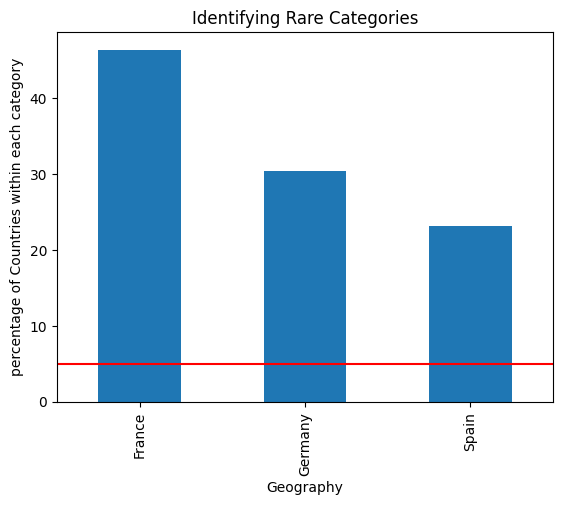

In [ ]:
fig = cat_freq.sort_values(ascending=False).plot.bar() # .plot.bar() will plot bar-plot.
fig.axhline(y=5, color='red') # axhline(y=5, color='red') will plot horizontal red line at y = 5
fig.set_ylabel('percentage of Countries within each category')
fig.set_xlabel('Geography')
fig.set_title('Identifying Rare Categories')
plt.show()

We can observe from the above barplot that we don't have any rare categories in the data. Similarly, we can check the rare categories for other categorical variables.

This code block is focused on creating a bar plot to visualize the frequency distribution of unique values in the 'Geography' column, with a specific emphasis on identifying rare categories. Here's a line-by-line explanation:

- `fig = cat_freq.sort_values(ascending=False).plot.bar()`: This line sorts the values in the `cat_freq` Series in descending order and then creates a bar plot. The variable `fig` stores the plot object, which allows for further customization.

- `fig.axhline(y=5, color='red')`: Adds a horizontal red line to the plot at y = 5. This can act as a reference line to easily identify categories that fall below a certain percentage threshold (in this case, 5%).

- `fig.set_ylabel('percentage of Countries within each category')`: Sets the label for the y-axis to 'percentage of Countries within each category', making it clear what the percentages on the y-axis represent.

- `fig.set_xlabel('Geography')`: Sets the label for the x-axis to 'Geography', indicating that the bars represent different geographic categories.

- `fig.set_title('Identifying Rare Categories')`: Adds the title 'Identifying Rare Categories' to the plot, which describes the purpose of the visualization.

- `plt.show()`: Displays the plot. This is especially useful in script-based environments where the plot won't automatically display.

The code, therefore, not only visualizes the distribution of the 'Geography' column but also adds elements to help the viewer identify categories that are rare or infrequent.

In [ ]:
def check_rare(df, var):
    """
    Plot the frequency of categories for a given variable and highlight categories that occur less than 5% of the time.

    Parameters:
    - df (DataFrame): The input DataFrame containing the variable to be analyzed.
    - var (str): The variable for which the frequency of categories is to be plotted.

    Returns:
    None. A bar plot is displayed.

    Note:
    A horizontal red line is drawn at y=5 to indicate the threshold for rare categories.
    """

    # Calculate the frequency of each category as a percentage of the total for the given variable
    cat_freq = 100 * df[var].value_counts(normalize=True)

    # Plot the frequencies in descending order
    fig = cat_freq.sort_values(ascending=False).plot.bar()

    # Draw a horizontal red line at y=5 as the threshold for rare categories
    fig.axhline(y=5, color='red')

    # Set axis labels and title
    fig.set_ylabel('category percentage frequency')
    fig.set_xlabel(var)
    fig.set_title(f'Identifying Rare Categories for {var}')

    # Show the plot
    plt.show()

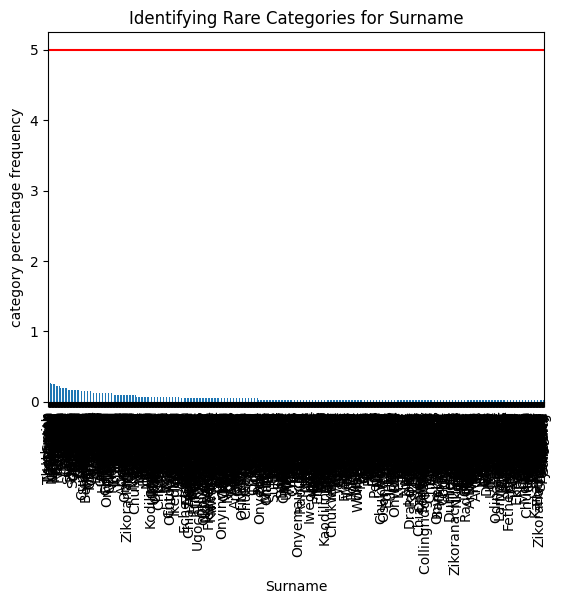

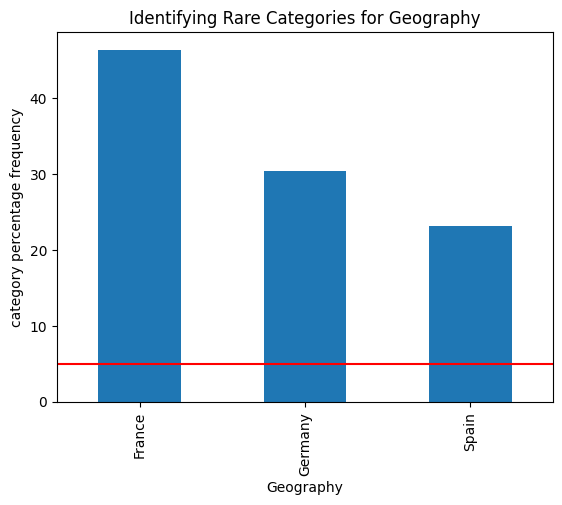

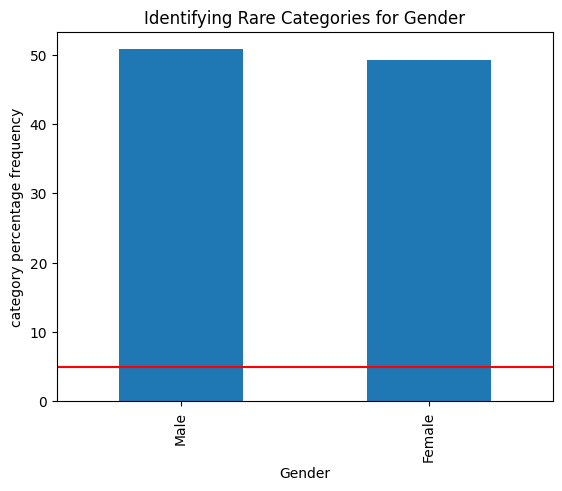

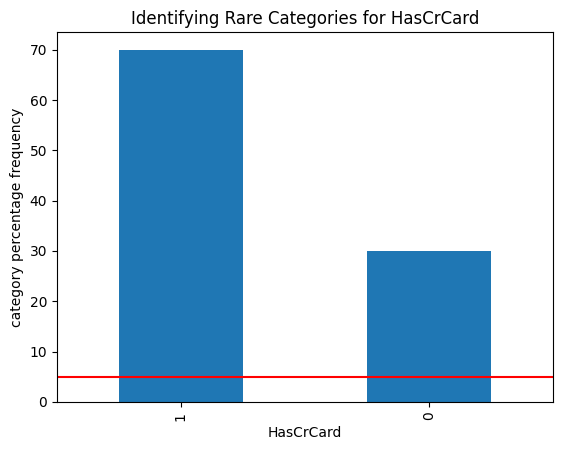

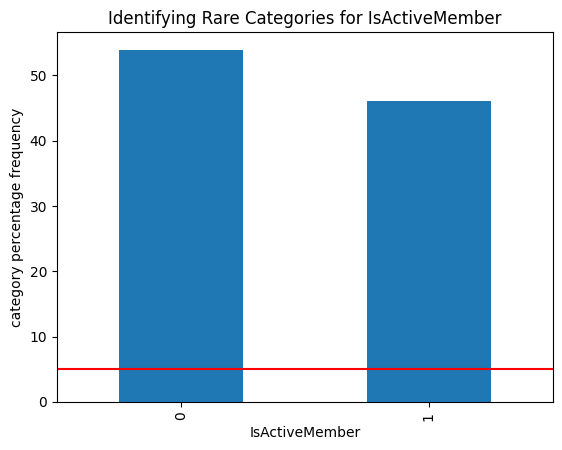

In [ ]:
for var in categorical:
  check_rare(df, var)

There are no rare categories except for `Surname`. Since we will not be using this variable we can conlcude that theer are no variables with rare categories.

#### <font color = 'indianred'> **Check distribution of target variable**

In [ ]:
# Frequency for each class of outcome
# 0 = customer who have not churned or still existing in the company
# 1 = customer who have churned out or left the company
print(df['Exited'].value_counts())

0    2037
1    2037
Name: Exited, dtype: int64


In [ ]:
# Precantage for each class of outcome
# 0 = customer who have not churned or still existing in the company
# 1 = customer who have churned out or left the company
print(f"{100 * df['Exited'].value_counts(normalize=True)} ")

0    50.0
1    50.0
Name: Exited, dtype: float64 


From the above analysis, we can observe that 50% of the people did not exit the company or didn't churn out.
 <font color = 'indianred'> We can see that the dataset is **balanced** i.e. we have equal number of observation for eacg class for labels.</font>

### <font color = 'indianred'>**Distribution of continuous and discrete variables**

We can use histograms, Q-Q plots, and Boxplots to check the distribution of continuous variables.

We created this function earlier. We have added this function in python file eda_plots. We have imorted the function and will use it now.

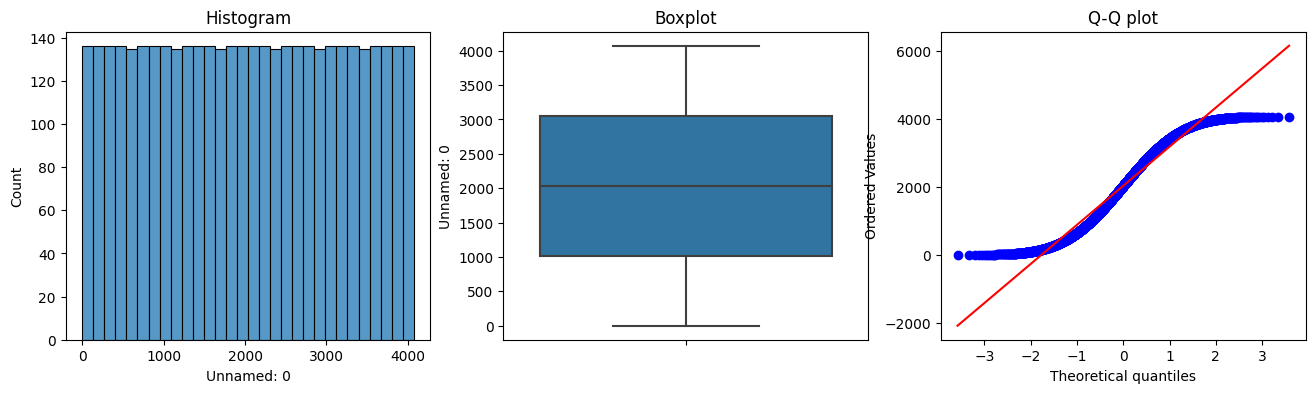

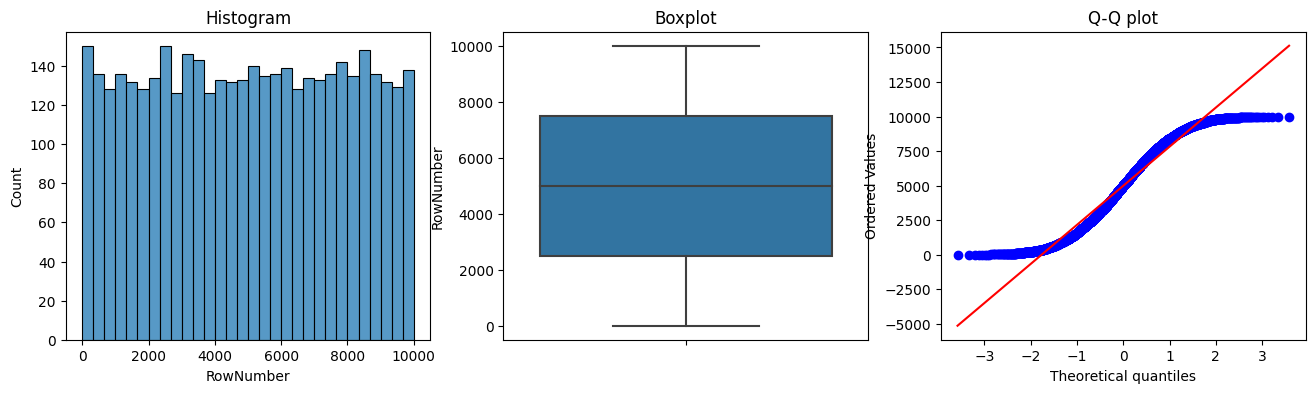

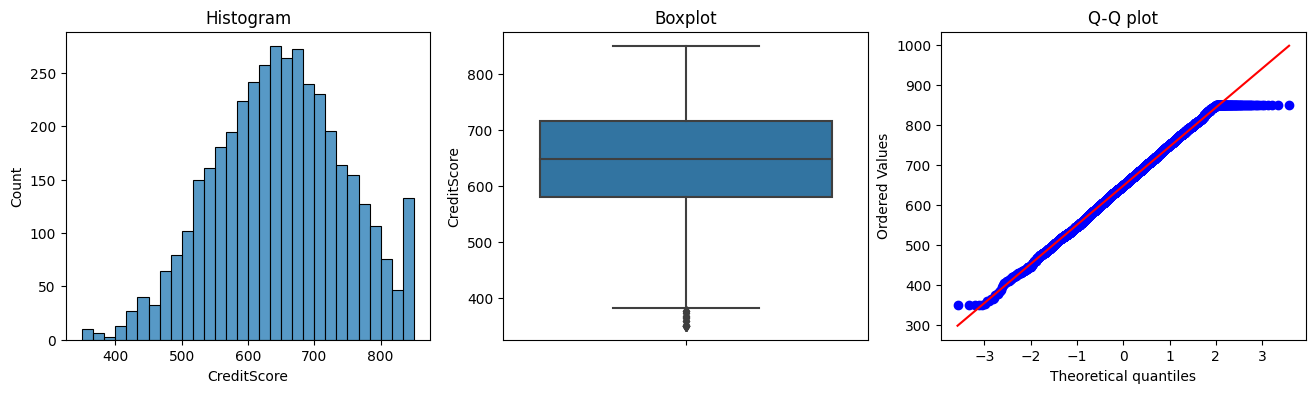

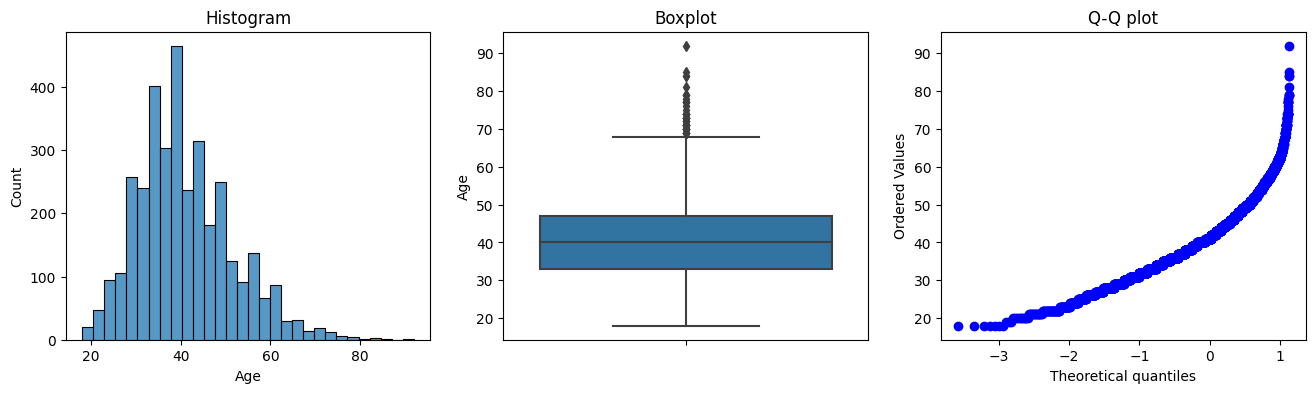

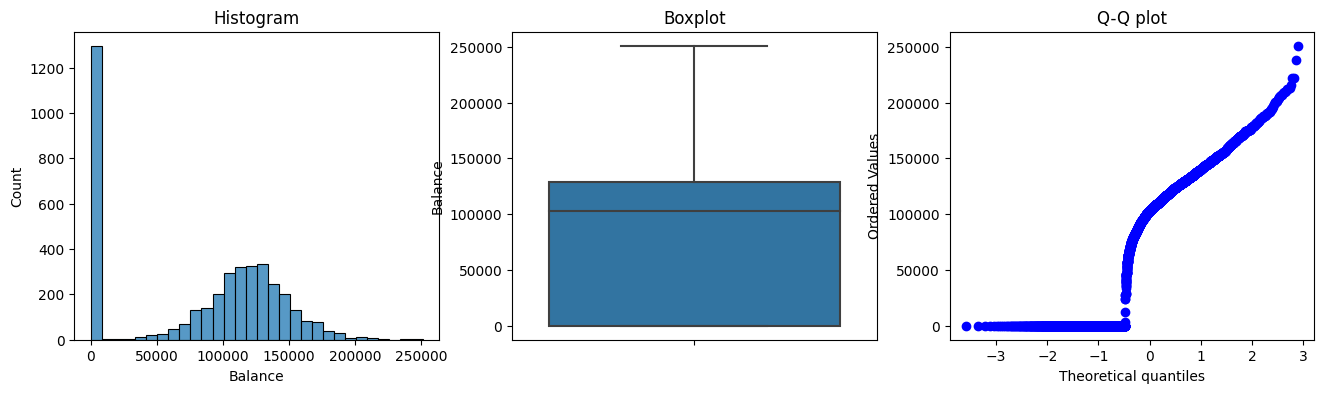

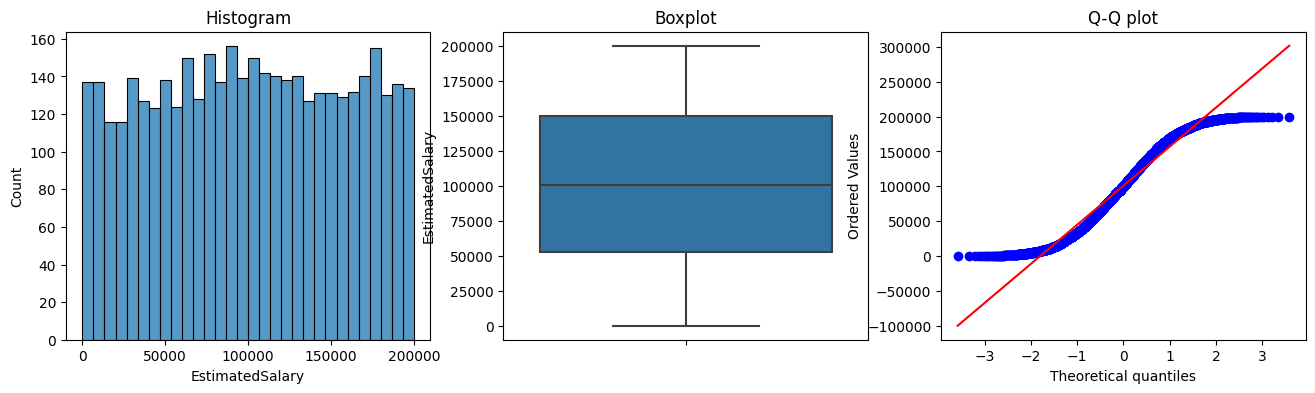

In [ ]:
for var in continuous:
    diagnostic_plots(df, var)

From the above plots, we can see that
* age has skewed distribution and has some outliers as well. We can use transformation to make it normal.
* Estimated salary has uniform distribution.
* Balance has lot of zeros.


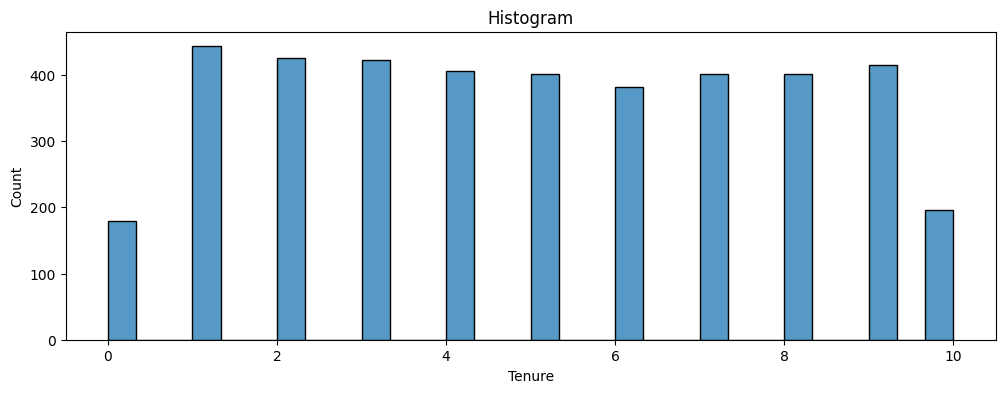

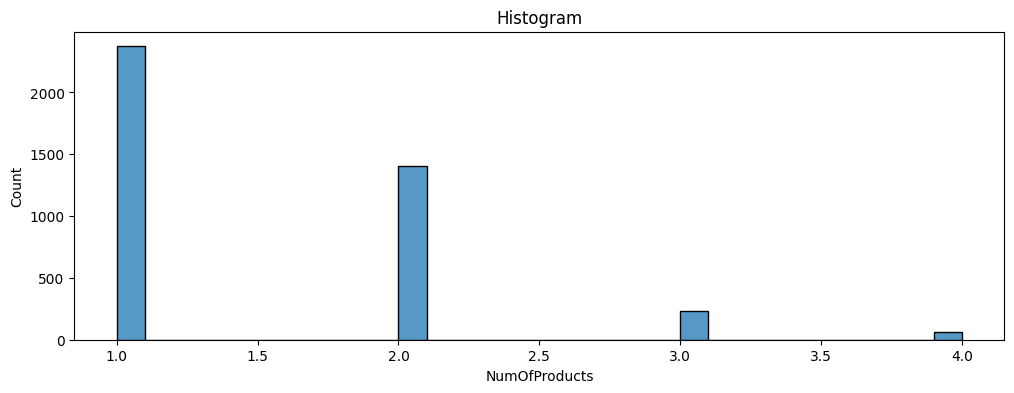

In [ ]:
# histograms for discrete variables
for var in discrete:
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 1, 1)
    sns.histplot(df[var], bins=30)
    plt.title('Histogram')

## <font color = 'indianred'>**Visualizing Relationships between variables**

### <font color = 'indianred'>**Correlation Matrix**

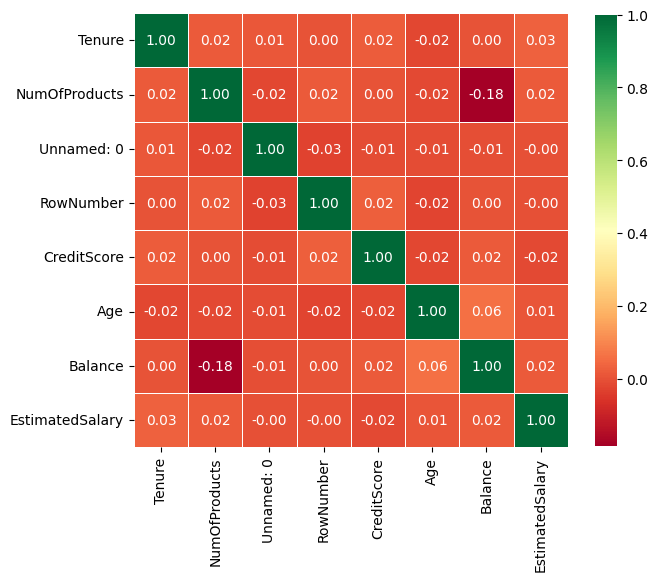

In [ ]:
# We can check the correlation between every pair of attributes
# The correlation will be generated for the numerical data only
# we will use df.corr() to get correlatons and then use sns.heatmap to print the correlation matrix
corrmat = df[discrete + continuous].corr().round(2)
top_corr_features = corrmat.index
plt.figure(figsize=(7, 7))
sns.heatmap(df[top_corr_features].corr(),annot=True, square=True, fmt='.2f',
            cbar_kws={"shrink": .80}, linewidths=.5, cmap='RdYlGn');

* None of the correlations are too high in this dataset.

### <font color = 'indianred'>**Relationship between Target variable and categorical variables**

Now, let's plot a bar-plot of each categorical variable w.r.t. churn rate of each category.


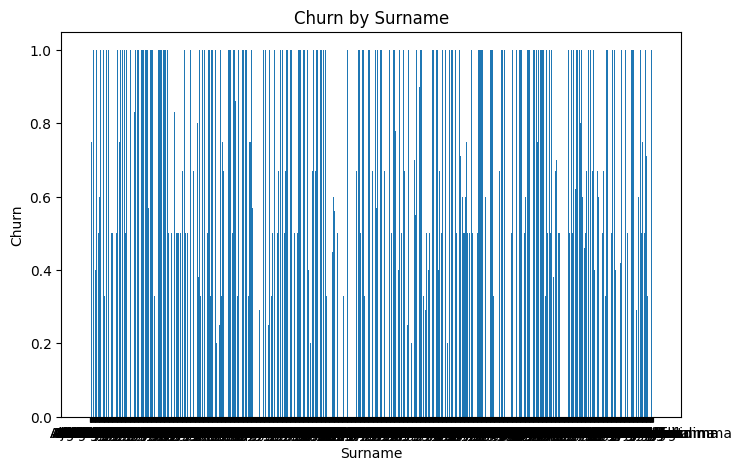

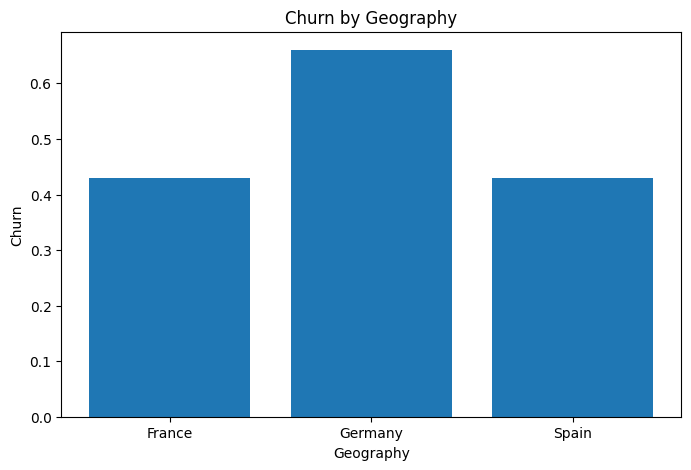

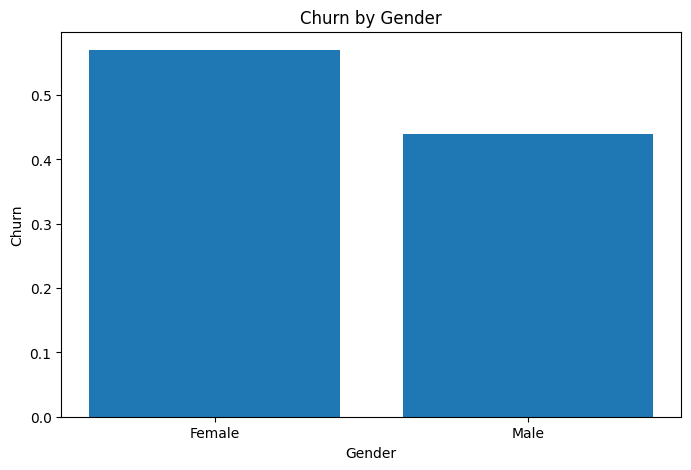

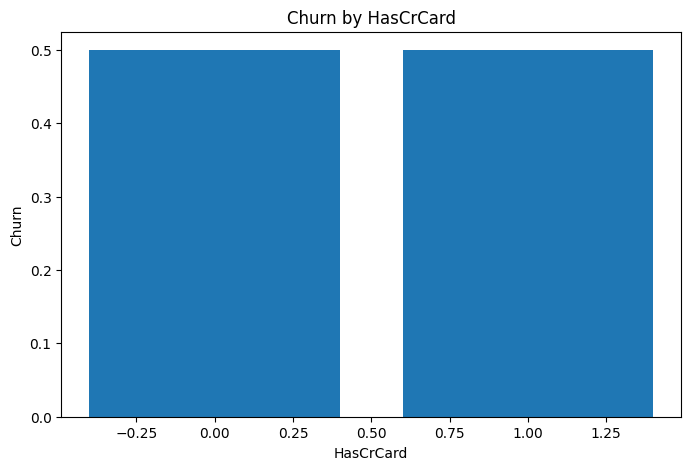

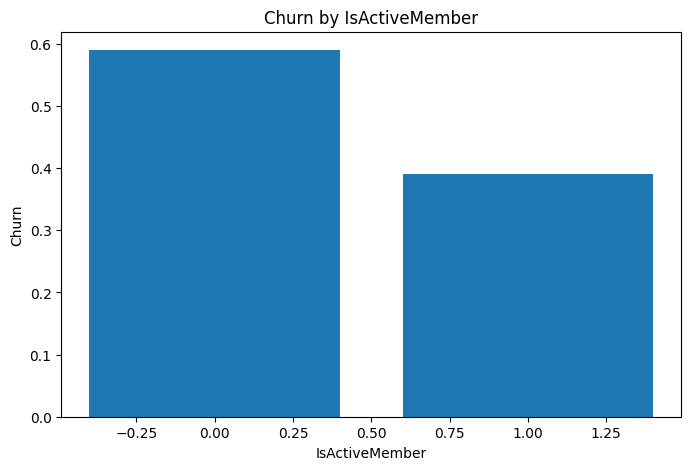

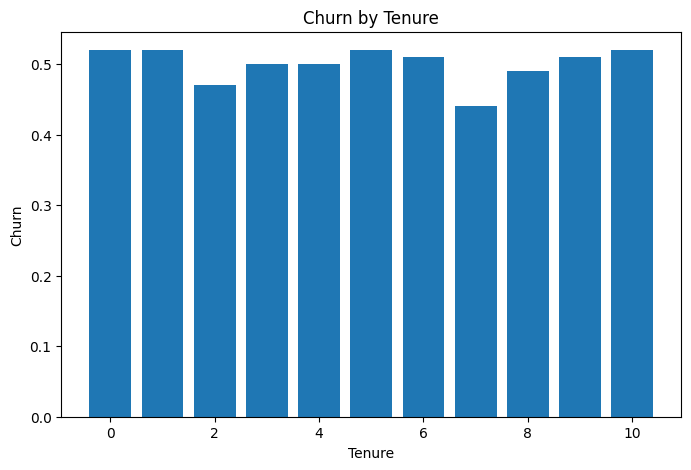

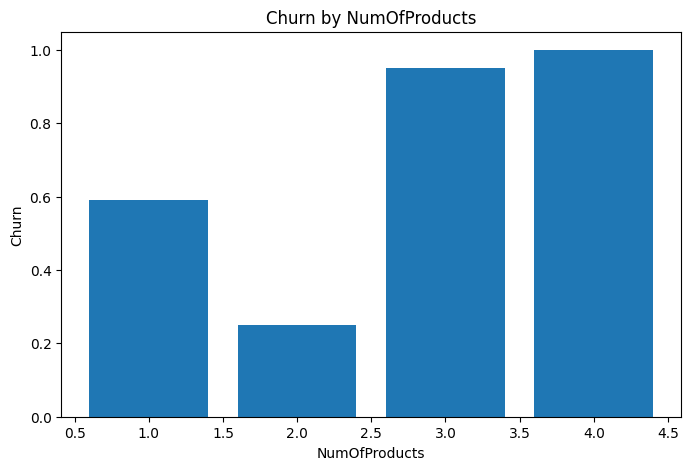

In [ ]:
# Plotting all categorical and discrete features using above function.
for category in categorical + discrete:
  plot_target_by_category(df, 'Exited',category,'Churn')

From the above charts, we can conclude that
- Germany has the highest churn rate.
- Females have a greater churn rate than males.
- Non-active members have a greater churn rate than active members.
- Customer's who have bought more number of products are more likely to churn (exit the company)  compared to customer's buying fewer number of products.

# <font color = 'indianred'>**Conclusion from EDA**</font>
From the above exploration of the data, we can come to some conclusions and they are:-

1. We have checked the number of missing values and we will use imputation methods to handle these missing values.

- Since Age and Geography has lot of missing values (greater than 10%), we can either use (1) mean/median/mode imputation startgeis or (2)   arbitrray value imputation where we will replace missing  values with arbitrray value of 999 and 'missing' for age and Geography respectively.
We will first try mean/median imputtaion and then finally try arbitrary value imputation.
- For balance, if we ignore zeros then it has normal distribution. One posibility is to first predict zero vs non-zero balance using other independent variables. If the prediction is zero then impute missing values using zero and if it is non-zero then impute missing values using mean(considering only non-zero values. For simplicity, we will use median for balance.
- Tenure is discrete and can take only 11 unique values. All the values from 3 to 9 seems equally likely. Hence we will use RandomSampleImputer for tenure(replace missing values with random values extracted from variable).
- NumOfProducts is discrete variable and can take only four values. One seems to be the most frequent value. The median is also one. So we can impute missing values using median.
- Gender is a ctegorical and has less than 10% missing values. Hence we will impute missing values with most frequent category.

3. From the distribution plot we have checked the distribution of each column. Distribution of 'Age' is skewed in nature. **We will use log transformation for Age.**
4. In our dataset Creditscore and Balance variables have non-standard distributions. Balance has a cluster of zeros and Creditscore has cluster of higher values.
We will use k-means discretization for Credit score and Balance.
5. **We will use onehot encoding for categorical variables: 'Geography', 'Gender', 'HasCrCard', 'IsActiveMember'**. Since we have discretized Credit score and balance, **we will use onehot encoding for Creditscore and Balance as well**.
6. In the previous notebook, we found that even after tarnsformation Age still has missing values, hense will use **Winsorization to remove outliers from Age**.
7. Finally, since **Age, Tenure, Num of Products and Estimated salary** have different order of magnitudes, we will scale these varibles.

<font size = 4 color = 'indianred'>**Summary:**

**We will apply following transformation in this order:**</font>
1. Median imputtaion for ['Balance', 'NumOfProducts']
2. Median imputation for Age followed by AddMissing Indicator. We will also try Arbitrary Number imputer for Age (in a different pipeline) (see Round 4)
3. CategoricalImputer(imputation_method = 'frequent') (impute missing value with most frequent category)  for Gender.
4. CategoricalImputer(imputation_method = 'frequent')  for Geography followed by AddMissing Indicator. We will also try CategoricalImputer(imputation_method = 'frequent') in a different pipeline (see round 4).
5. RandomSampleImpuer (impute missing values by random values extracted from variable) for Tenure.
6. Log Transfornation for Age
7. k-means discretization for Creditscore and Balance.
8. One hot encoding encoding for : Geography, Gender, HasCrCard, IsActiveMember, Creditscore and Balance.
9. Winsorization to remove outliers from Age
10. Standard Saclar for Age, Tenure, Num of Products and Estimated salary.



